# Data Mining Assignment 2
# Muhammad Waleed
# 20B-115-SE 
# SE-B

In [25]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv('anime.csv')
print(df.head())

   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  


In [27]:
cols = [col for col in df.columns]
print(cols)

['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members']


In [28]:
anime_values = df.values
print(df.shape)

(12294, 7)


In [29]:
anime_types = []
for i in range(len(df)):
    if anime_values[i][3] not in anime_types:
        anime_types.append(anime_values[i][3])

print(anime_types)

['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan]


In [30]:
for anime_type in anime_types:
    print(f'Total {anime_type}: {len(df[df.type == anime_type])}')

Total Movie: 2348
Total TV: 3787
Total OVA: 3311
Total Special: 1676
Total Music: 488
Total ONA: 659
Total nan: 0


In [31]:
anime_data = df[df.type == 'TV']
movie_data = df[df.type == 'Movie']
print(anime_data.shape)
print(movie_data.shape)
anime_data['episodes'] = anime_data['episodes'].replace('Unknown', np.nan)

(3787, 7)
(2348, 7)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21192\107942904.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_data['episodes'] = anime_data['episodes'].replace('Unknown', np.nan)


In [32]:
best_tv_by_rating = anime_data.sort_values(by='rating', ascending=False)
best_tv_by_members = anime_data.sort_values(by='members', ascending=False)
best_tv_by_episodes = anime_data.sort_values(by='episodes', ascending=False)

best_movies_by_rating = movie_data.sort_values(by='rating', ascending=False)
best_movies_by_members = movie_data.sort_values(by='members', ascending=False)
best_movies_by_episodes = movie_data.sort_values(by='episodes', ascending=False)

In [33]:
print(best_tv_by_rating.head(10))
print(best_tv_by_members.head(10))
print(best_tv_by_episodes.head(10))

       anime_id                                               name  \
10400     30120                        Spoon-hime no Swing Kitchen   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                           Gintama°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
5         32935  Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...   
6         11061                             Hunter x Hunter (2011)   
9         15417                           Gintama&#039;: Enchousen   
10         4181                               Clannad: After Story   
12          918                                            Gintama   

                                                   genre type episodes  \
10400                                    Adventure, Kids   TV      NaN   
1      Action, Adventure, Drama, Fantasy, Magic, Mili...   TV       64   
2      

In [34]:
print(best_movies_by_rating.head(10))
print(best_movies_by_members.head(10))
print(best_movies_by_episodes.head(10))

       anime_id                                               name  \
10464     33662            Taka no Tsume 8: Yoshida-kun no X-Files   
9595      23005                                   Mogura no Motoro   
0         32281                                     Kimi no Na wa.   
9078      33607                                       Kahei no Umi   
8         15335  Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...   
11        28851                                     Koe no Katachi   
9577      33980                Mirai ni Mukete: Bousai wo Kangaeru   
9831      26145                                  Okaachan Gomen ne   
10181     32627                                   Shaka no Shougai   
10191     32796                            Shenmi Shijie Lixian Ji   

                                                   genre   type episodes  \
10464                                     Comedy, Parody  Movie        1   
9595                                       Slice of Life  Movie        1   
0

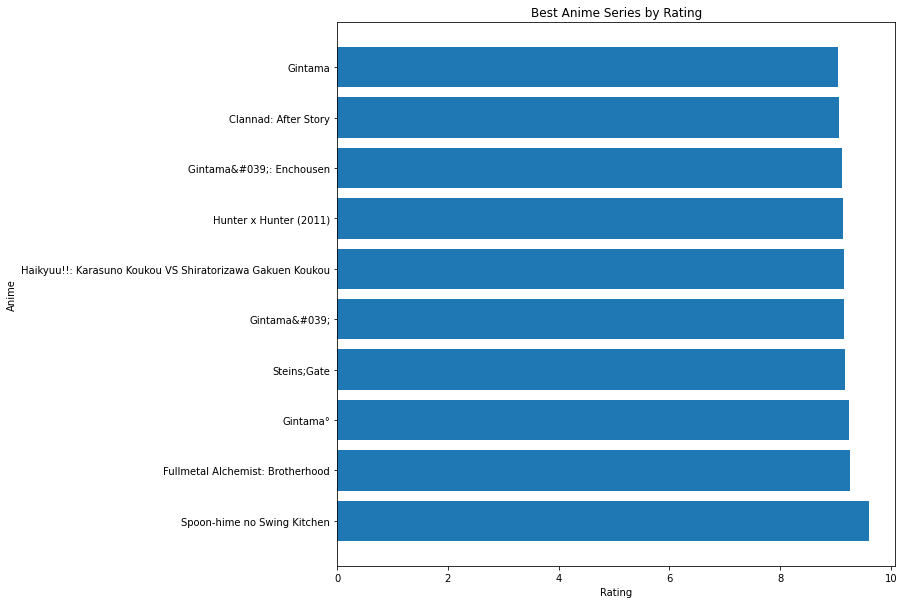

In [35]:
plt.figure(figsize=(10,10))
plt.barh(best_tv_by_rating['name'].head(10),best_tv_by_rating['rating'].head(10))
plt.title('Best Anime Series by Rating')
plt.xlabel('Rating')
plt.ylabel('Anime')
plt.show()

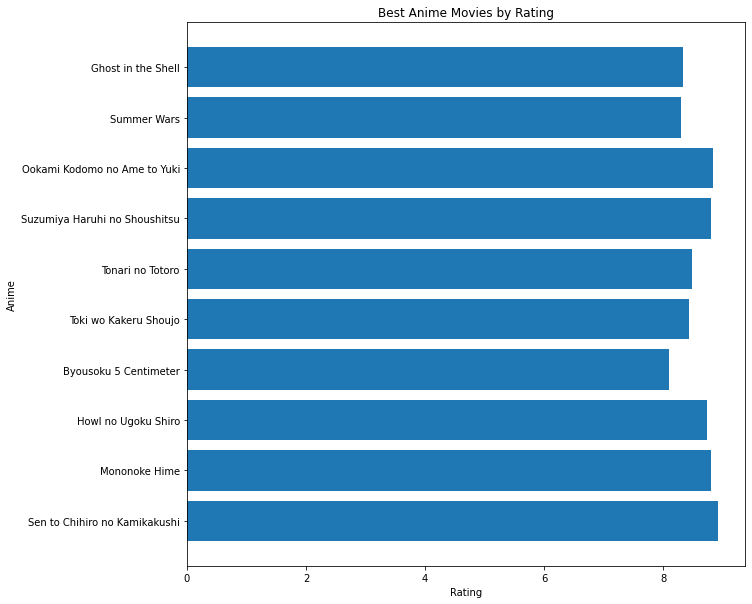

In [36]:
plt.figure(figsize=(10,10))
plt.barh(best_movies_by_members['name'].head(10),best_movies_by_members['rating'].head(10))
plt.title('Best Anime Movies by Rating')
plt.xlabel('Rating')
plt.ylabel('Anime')
plt.show()

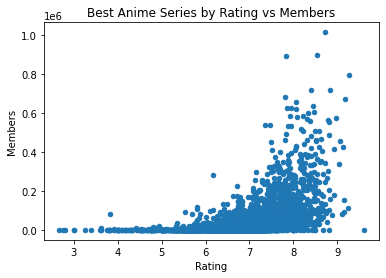

In [37]:
plot_data = pd.concat([best_tv_by_rating['rating'], best_tv_by_members['members']], axis=1)
plot_data.columns = ['rating', 'members']
plot_data.plot(kind='scatter', x='rating', y='members')
plt.title('Best Anime Series by Rating vs Members')
plt.xlabel('Rating')
plt.ylabel('Members')
plt.show()
